# Classification Models

In [1]:
import pandas as pd
import numpy as np

## plotting libraries
from matplotlib import pyplot as plt

## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

## 1. Rond 1

### 1.1. Loading Classification Sample Datasets

In [3]:
# read data
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
churnData.gender.unique()

array(['Female', 'Male'], dtype=object)

In [5]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

### 1.2. Cleaning Data

In [6]:
# Convert the column TotalCharges and
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [7]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [8]:
# fill the NaN elements with mean
churnData.fillna(churnData['TotalCharges'].median(), inplace=True)

In [9]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### 1.3. Checking for Correlation

In [10]:
input_features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

In [11]:
# Print out a correlation matrix
corr_matrix_input_feat = churnData[input_features].corr()
print(corr_matrix_input_feat)

                  tenure  SeniorCitizen  MonthlyCharges  TotalCharges
tenure          1.000000       0.016567        0.247900      0.825464
SeniorCitizen   0.016567       1.000000        0.220173      0.102652
MonthlyCharges  0.247900       0.220173        1.000000      0.650864
TotalCharges    0.825464       0.102652        0.650864      1.000000


<AxesSubplot:>

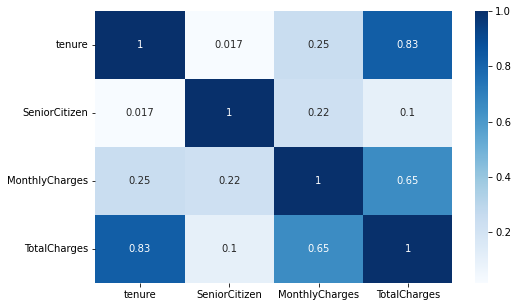

In [12]:
# Create a heatmap
import seaborn as sns
import statsmodels.api as sm

fig3 = plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix_input_feat,annot=True, cmap='Blues') # Another choice of plette: cmap='coolwarm'

### 1.3. Spliting Data

#### 1.3.1. Spliting target variable (x) and predictor variable (y)

In [13]:
selected_features = input_features.copy()
selected_features.remove('tenure')
selected_features

['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

In [14]:
X = churnData.loc[:, selected_features]
y = churnData.Churn

In [15]:
# selected_features = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
# X = churnData.loc[:, selected_features]
# y = churnData.Churn

In [16]:
X.isna().any()

SeniorCitizen     False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [17]:
X

,SeniorCitizen,MonthlyCharges,TotalCharges
0,0,29.85,29.85
1,0,56.95,1889.50
2,0,53.85,108.15
3,0,42.30,1840.75
4,0,70.70,151.65
...,...,...,...
7038,0,84.80,1990.50
7039,0,103.20,7362.90
7040,0,29.60,346.45
7041,1,74.40,306.60


#### 1.3.2. Spliting Training Set and Testing Set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TT_SPLIT, random_state = RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges
6924,0,69.35,69.35
5249,0,67.20,4671.70
5852,1,69.10,1474.75


### 1.4. Standardizing Data

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns = selected_features)
X_test_sc  = pd.DataFrame(X_test_sc, columns = selected_features)

### 1.5. Predictive Modeling

#### 1.5.1. Applying Logistic Regression Model

In [20]:
def get_model_LogisticRegression(X_tn, X_tt, y_tn, y_tt):
    
    scaler = StandardScaler()
    
    X_tn_sc = scaler.fit_transform(X_tn)
    X_tt_sc = scaler.transform(X_tt)

    X_tn_sc = pd.DataFrame(X_tn, columns = selected_features)
    X_tt_sc  = pd.DataFrame(X_tt, columns = selected_features)
    
    log_model = LogisticRegression() 

    log_model.fit(X_tn_sc, y_tn)
    
    return log_model

In [21]:
scaler = StandardScaler()
    
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train, columns = selected_features)
X_test_sc  = pd.DataFrame(X_test, columns = selected_features)
    
log_model = LogisticRegression() 

log_model.fit(X_train_sc, y_train)

y_pred_train_log = log_model.predict(X_train_sc)
y_pred_test_log = log_model.predict(X_test_sc)

In [22]:
# def error_metric_df(y_train, y_test, y_pred_train, y_pred_test):
#     y_train_np = y_train.to_numpy()
#     y_test_np = y_test.to_numpy()
    
#     performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
#                                     'Train': [accuracy_score(y_train_np, y_pred_train),
#                                               precision_score(y_train_np, y_pred_train, pos_label='Yes'),
#                                               recall_score(y_train_np, y_pred_train, pos_label='Yes')],
#                                     'Test': [accuracy_score(y_test_np, y_pred_test),
#                                              precision_score(y_test_np, y_pred_test, pos_label='Yes'),
#                                              recall_score(y_test_np, y_pred_test, pos_label='Yes')]})
#     return display(performance)

In [23]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_log),
                                          precision_score(y_train_np, y_pred_train_log, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_log, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_log),
                                         precision_score(y_test_np, y_pred_test_log, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_log, pos_label='Yes')]})

display(performance_log)


,Error_metric,Train,Test
0,Accuracy,0.793575,0.779986
1,Precision,0.651456,0.660305
2,Recall,0.454915,0.439086


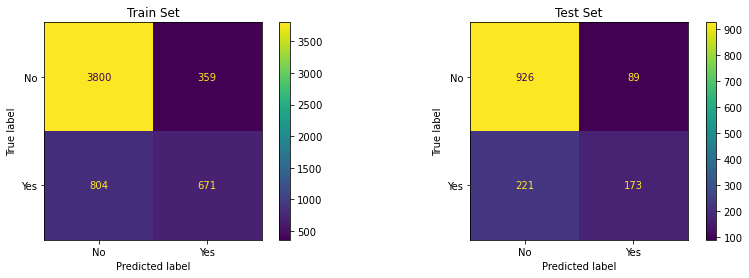

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_log)
cm_test = confusion_matrix(y_test_np, y_pred_test_log)

ConfusionMatrixDisplay(cm_train, display_labels=log_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")
            
ConfusionMatrixDisplay(cm_test, display_labels=log_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

#### 1.5.2. Applying Knn Classifier Model

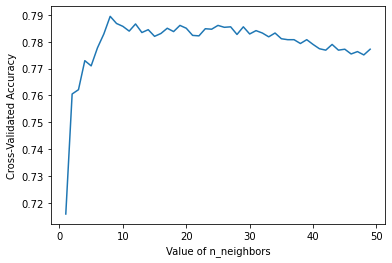

The best value of n_neighbors is 8


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Create KNN model
knn_model = KNeighborsClassifier()

# Create list of values of n_neighbors to evaluate
n_neighbors = range(1, 50)

# Evaluate KNN model for each value of n_neighbors using 10-fold cross-validation
scores = []
for n in n_neighbors:
    knn_model.set_params(n_neighbors=n)
    score = cross_val_score(knn_model, X_train_sc, y_train, cv=10, scoring='accuracy').mean()
    scores.append(score)

# Plot the results
plt.plot(n_neighbors, scores)
plt.xlabel('Value of n_neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Select best value of n_neighbors based on cross-validation results
best_n_neighbor = n_neighbors[np.argmax(scores)]
print(f"The best value of n_neighbors is {best_n_neighbor}")


In [26]:
def get_model_KNeighborsClassifier(X_tn, X_tt, y_tn, y_tt, n_neighbors = n):
    scaler = StandardScaler()
    
    X_tn_sc = scaler.fit_transform(X_tn)
    X_tt_sc = scaler.transform(X_tt)

    X_tn_sc = pd.DataFrame(X_tn_sc, columns = selected_features)
    X_tt_sc  = pd.DataFrame(X_tt_sc, columns = selected_features)
    
    knn_model = KNeighborsClassifier(n_neighbors = n, weights = 'uniform') 
    
    knn_model.fit(X_tn_sc, y_tn) 
    
    return knn_model

In [27]:
knn_model = KNeighborsClassifier(n_neighbors = best_n_neighbor, weights = 'uniform') 
knn_model.fit(X_train_sc, y_train) 

y_pred = knn_model.predict(X_test_sc) 

y_pred_train_knn = knn_model.predict(X_train_sc)
y_pred_test_knn = knn_model.predict(X_test_sc)

In [28]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_knn),
                                          precision_score(y_train_np, y_pred_train_knn, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_knn, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_knn),
                                         precision_score(y_test_np, y_pred_test_knn, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_knn, pos_label='Yes')]})

display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,0.818069,0.770050
1,Precision,0.761628,0.650862
2,Recall,0.444068,0.383249


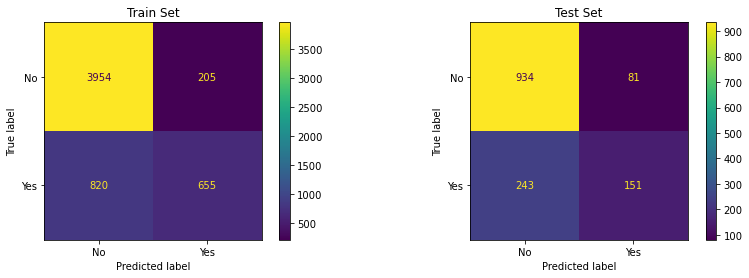

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_knn)
cm_test = confusion_matrix(y_test_np, y_pred_test_knn)

ConfusionMatrixDisplay(cm_train, display_labels=knn_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=knn_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

#### 1.5.3. Comparing KNN and Logistic Regression Models

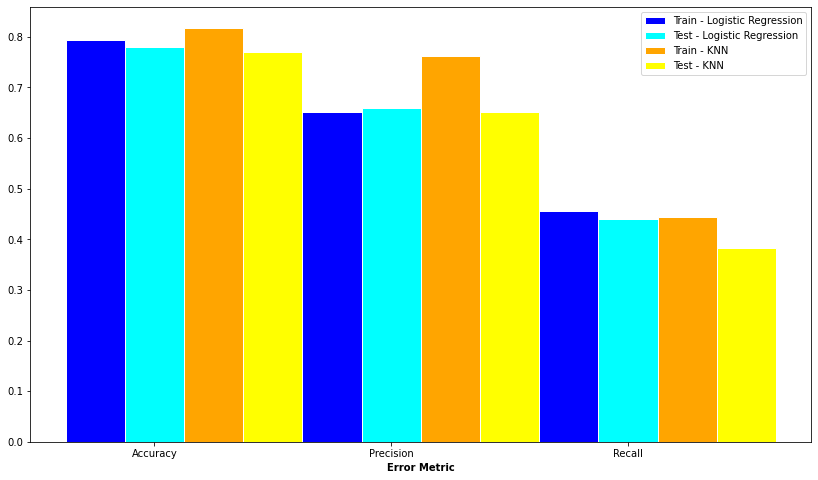

In [30]:
# Create bar chart comparing KNN and logistic regression models
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the figure
plt.figure(figsize=(14, 8))

# Set the width of the bars
barWidth = 0.25

# Set the height of the bars
bars_train_log = performance_log['Train']
bars_test_log = performance_log['Test']
bars_train_knn = performance_knn['Train']
bars_test_knn = performance_knn['Test']

# Set the position of the bars on the x-axis
r1 = np.arange(len(bars_train_log))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plot the bars
plt.bar(r1, bars_train_log, color='blue', width=barWidth, edgecolor='white', label='Train - Logistic Regression')
plt.bar(r2, bars_test_log, color='cyan', width=barWidth, edgecolor='white', label='Test - Logistic Regression')
plt.bar(r3, bars_train_knn, color='orange', width=barWidth, edgecolor='white', label='Train - KNN')
plt.bar(r4, bars_test_knn, color='yellow', width=barWidth, edgecolor='white', label='Test - KNN')

# Add xticks on the middle of the group bars
plt.xlabel('Error Metric', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars_train_log))], ['Accuracy', 'Precision', 'Recall'])

# Add a legend
plt.legend()

# Show the chart
plt.show()

## 2. Round 2

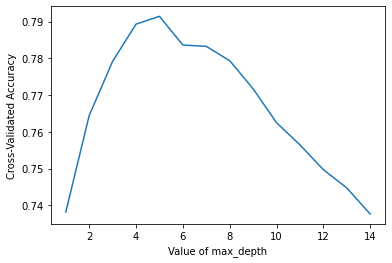

The best value of max_depth is 5


In [31]:
# get the best max_depth 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Create list of values of max_depth to evaluate
max_depths = range(1, 15)

# Evaluate Decision Tree model for each value of max_depth using 10-fold cross-validation
scores = []
for depth in max_depths:
    dt_model.set_params(max_depth=depth)
    # no need to scale the train and test set, so X_train istead of X_train_sc
    score = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy').mean()
    scores.append(score)

# Plot the results
plt.plot(max_depths, scores)
plt.xlabel('Value of max_depth')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Select best value of max_depth based on cross-validation results
best_max_depth = max_depths[np.argmax(scores)]
print(f"The best value of max_depth is {best_max_depth}")


In [32]:
def get_model_DecisionTreeClassifier(X_tn, X_tt, y_tn, y_tt, max_depth = n):
    
    dt_model = DecisionTreeClassifier(max_depth = n)  
    
    dt_model.fit(X_tn, y_tn) 

    y_pred = dt_model.predict(X_tt) 
    
    return dt_model

In [33]:
dt_model = DecisionTreeClassifier(max_depth = best_max_depth)

dt_model.fit(X_train, y_train) 

y_pred = dt_model.predict(X_test) 

y_pred_train_td = dt_model.predict(X_train)
y_pred_test_td = dt_model.predict(X_test)

In [34]:
X_train

,SeniorCitizen,MonthlyCharges,TotalCharges
6924,0,69.35,69.350
5249,0,67.20,4671.700
5852,1,69.10,1474.750
3597,0,95.70,2338.350
4147,1,24.85,1901.000
...,...,...,...
5218,0,19.70,1397.475
4060,0,63.35,3409.100
1346,0,87.25,1258.600
3454,1,35.65,1025.150


<BarContainer object of 3 artists>

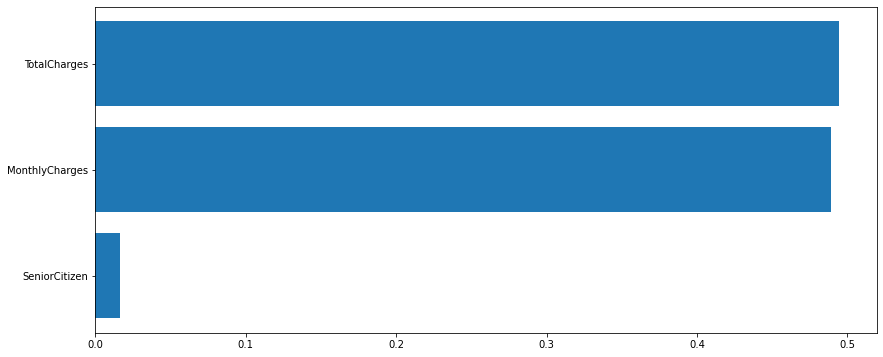

In [35]:
plt.figure(figsize=(14,6))
plt.barh(X.columns,dt_model.feature_importances_)

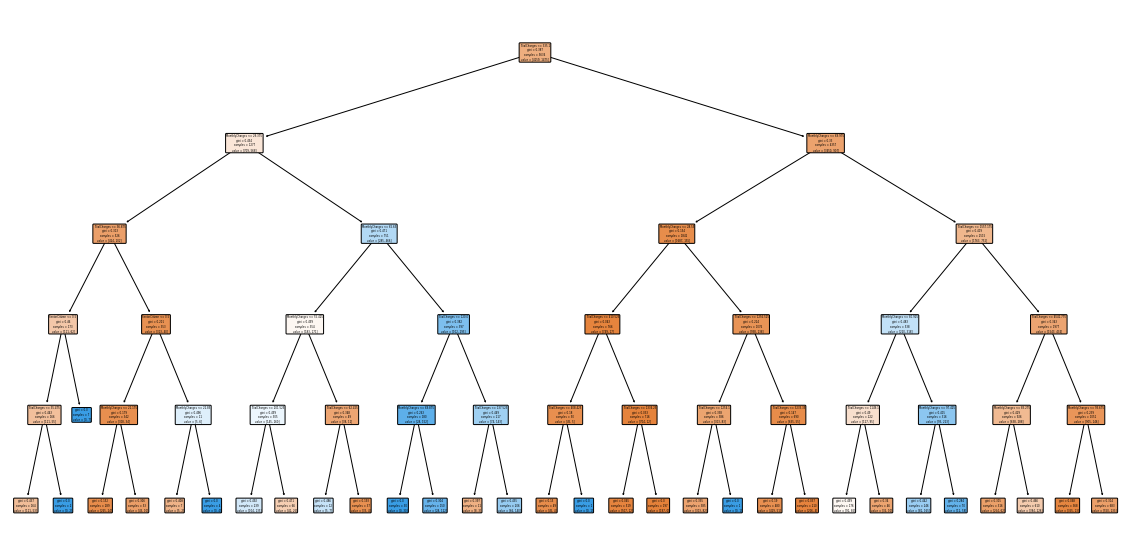

In [36]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(dt_model, 
          filled = True, 
          rounded = True,  
          # show the feature names
          feature_names = X_train.columns)
plt.show()

In [37]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_td = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_td),
                                          precision_score(y_train_np, y_pred_train_td, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_td, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_td),
                                         precision_score(y_test_np, y_pred_test_td, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_td, pos_label='Yes')]})

display(performance_td)

,Error_metric,Train,Test
0,Accuracy,0.804934,0.780696
1,Precision,0.694215,0.673469
2,Recall,0.455593,0.418782


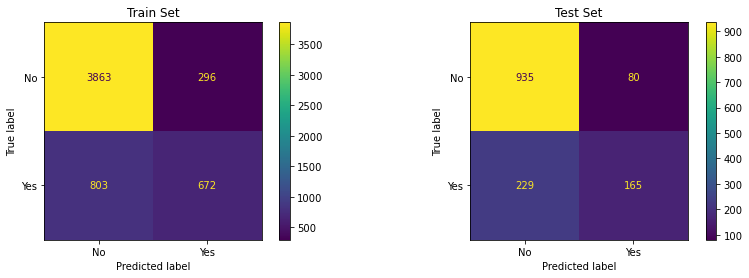

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_td)
cm_test = confusion_matrix(y_test_np, y_pred_test_td)

ConfusionMatrixDisplay(cm_train, display_labels=dt_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=dt_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

# Round 3

## 3.1 Applying K-fold Cross Validation

In [39]:
model_pipeline = [log_model, knn_model, dt_model]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Logistical Regression': 0.7934031845609262, 'K-Nearest Neighbors': 0.7894977514077322, 'Decision Tree': 0.7914436970132145}


In [40]:
print("Comparing the 3 regression scores we find \n")

compare_models = pd.DataFrame([scores], index=["score"])
compare_models

Comparing the 3 regression scores we find 



,Logistical Regression,K-Nearest Neighbors,Decision Tree
score,0.793403,0.789498,0.791444


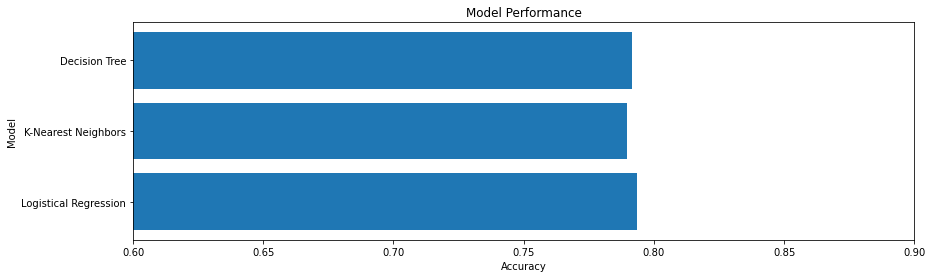

In [69]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14,4))

# Create the horizontal bar chart
ax.barh(list(scores.keys()), list(scores.values()))

# Set the title and axis labels
ax.set_title('Model Performance')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')

# Set the x-axis range
ax.set_xlim([0.6, 0.9])

# Display the chart
plt.show()


## 3.2. Managing Imbalance in the Dataset

### 3.2.1. Upsampling

#### 3.2.1.1. Using SMOTE

In [42]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

Note: you may need to restart the kernel to use updated packages.


In [43]:
# Check the inbalance
y_train.value_counts()

No     4159
Yes    1475
Name: Churn, dtype: int64

In [44]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

Yes    4159
No     4159
Name: Churn, dtype: int64

#### 3.2.1.1. K-fold Cross Validation - Upsampling (SMOTE)

In [45]:
# apply to upsampled train sets and get models
log_model_sm = get_model_LogisticRegression(X_train_sm, X_test, y_train_sm, y_test)
knn_model_sm = get_model_KNeighborsClassifier(X_train_sm, X_test, y_train_sm, y_test, n_neighbors = best_n_neighbor)
dt_model_sm = get_model_DecisionTreeClassifier(X_train_sm, X_test, y_train_sm, y_test, max_depth = best_max_depth)

In [46]:
model_pipeline = [log_model_sm, knn_model_sm, dt_model_sm]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores_sm = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_sm, y_train_sm, cv=10))
    scores_sm[model_names[i]] = mean_score
    i = i+1
print(scores_sm)

{'Logistical Regression': 0.7180809150236046, 'K-Nearest Neighbors': 0.7236129431639359, 'Decision Tree': 0.7503061938813294}


In [77]:
scores_sm_df = pd.DataFrame([scores_sm], index=["Upsampling (SMOTE)"])
scores_sm_df['sampling'] = 'Upsampling (SMOTE)'
scores_sm_df

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
Upsampling (SMOTE),0.718081,0.723613,0.750306,Upsampling (SMOTE)


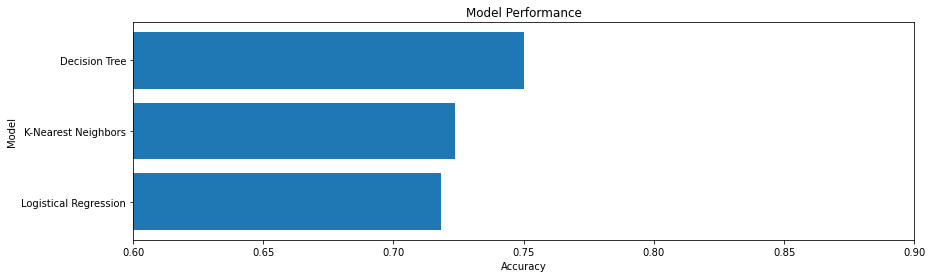

In [68]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14,4))

# Create the horizontal bar chart
ax.barh(list(scores_sm.keys()), list(scores_sm.values()))

# Set the title and axis labels
ax.set_title('Model Performance')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')

# Set the x-axis range
ax.set_xlim([0.6, 0.9])

# Display the chart
plt.show()

#### 3.2.1.1. Using Pandas Sample

In [48]:
# Assemble train set

train = pd.concat([X_train, y_train.to_frame()], axis=1)

category_no = train[train['Churn'] == 'No'] # negative class (majority)
category_yes = train[train['Churn'] == 'Yes'] # positive class (minority)

no_len = len(category_no)

category_yes_up = category_yes.sample(no_len, replace = True)

In [49]:
# reassemble the data
train_up = pd.concat([category_no, category_yes_up], axis=0)
# shuffle the data
train_up = train_up.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
train_up['Churn'].value_counts()

Yes    4159
No     4159
Name: Churn, dtype: int64

In [50]:
X_train_up = train_up.drop(['Churn'], axis=1)
y_train_up = train_up['Churn']

#### K-fold Cross Validation - Upsampling (Pandas Sample)

In [51]:
# apply to upsampled train sets and get models
log_model_up = get_model_LogisticRegression(X_train_up, X_test, y_train_up, y_test)
knn_model_up = get_model_KNeighborsClassifier(X_train_up, X_test, y_train_up, y_test, n_neighbors = best_n_neighbor)
dt_model_up = get_model_DecisionTreeClassifier(X_train_up, X_test, y_train_up, y_test, max_depth = best_max_depth)

In [52]:
model_pipeline = [log_model_up, knn_model_up, dt_model_up]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores_up = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_up, y_train_up, cv=5))
    scores_up[model_names[i]] = mean_score
    i = i+1
print(scores_up)

{'Logistical Regression': 0.7190441567602572, 'K-Nearest Neighbors': 0.7218096639530043, 'Decision Tree': 0.866674640940839}


In [76]:
scores_up_df = pd.DataFrame([scores_up], index=["Upsampling (Pandas Sample)"])
scores_up_df['sampling'] = 'Upsampling (Pandas Sample)'
scores_up_df

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
Upsampling (Pandas Sample),0.719044,0.72181,0.866675,Upsampling (Pandas Sample)


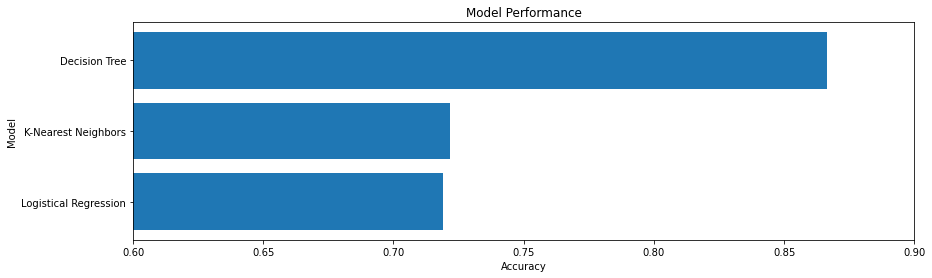

In [67]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14,4))

# Create the horizontal bar chart
ax.barh(list(scores_up.keys()), list(scores_up.values()))

# Set the title and axis labels
ax.set_title('Model Performance')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')

# Set the x-axis range
ax.set_xlim([0.6, 0.9])

# Display the chart
plt.show()

### 3.2.2. Downsampling

#### 3.2.2.1.  Using TomekLinks

In [54]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority') # resample only the majority class
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train) # returns resampled data
y_train_tl.value_counts() # check the distribution of resampled labels

No     3710
Yes    1475
Name: Churn, dtype: int64

#### K-fold Cross Validation - Downsampling (TomekLinks)

In [55]:
# apply to upsampled train sets and get models
log_model_tl = get_model_LogisticRegression(X_train_tl, X_test, y_train_tl, y_test)
knn_model_tl = get_model_KNeighborsClassifier(X_train_tl, X_test, y_train_tl, y_test, n_neighbors = best_n_neighbor)
dt_model_tl = get_model_DecisionTreeClassifier(X_train_tl, X_test, y_train_tl, y_test, max_depth = best_max_depth)

In [56]:
model_pipeline = [log_model_tl, knn_model_tl, dt_model_tl]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores_tl = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_tl, y_train_tl, cv=5))
    scores_tl[model_names[i]] = mean_score
    i = i+1
print(scores_tl)

{'Logistical Regression': 0.7915139826422373, 'K-Nearest Neighbors': 0.781099324975892, 'Decision Tree': 0.7515911282545806}


In [74]:
scores_tl_df = pd.DataFrame([scores_tl], index=["Downsampling (TomekLinks)"])
scores_tl_df['sampling'] = 'Downsampling (TomekLinks)'
scores_tl_df

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
Downsampling (TomekLinks),0.791514,0.781099,0.751591,Downsampling (TomekLinks)


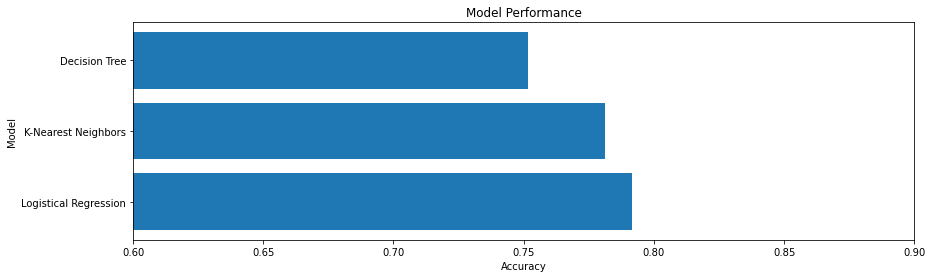

In [66]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14,4))

# Create the horizontal bar chart
ax.barh(list(scores_tl.keys()), list(scores_tl.values()))

# Set the title and axis labels
ax.set_title('Model Performance')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')

# Set the x-axis range
ax.set_xlim([0.6, 0.9])

# Display the chart
plt.show()

#### 3.2.2.2. Using Pandas Sample

In [58]:
# Assemble train set

train = pd.concat([X_train, y_train.to_frame()], axis=1)

category_no = train[train['Churn'] == 'No'] # negative class (majority)
category_yes = train[train['Churn'] == 'Yes'] # positive class (minority)

yes_len = len(category_yes)

category_no_down = category_no.sample(yes_len)

In [59]:
# reassemble the data
train_down = pd.concat([category_no_down, category_yes], axis=0)
# shuffle the data
train_down = train_down.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
train_down['Churn'].value_counts()

Yes    1475
No     1475
Name: Churn, dtype: int64

In [60]:
X_train_down = train_down.drop(['Churn'], axis=1)
y_train_down = train_down['Churn']

#### K-fold Cross Validation - Downsampling (Pandas Sample)

In [61]:
# apply to upsampled train sets and get models
log_model_down = get_model_LogisticRegression(X_train_down, X_test, y_train_down, y_test)
knn_model_down = get_model_KNeighborsClassifier(X_train_down, X_test, y_train_down, y_test, n_neighbors = best_n_neighbor)
dt_model_down = get_model_DecisionTreeClassifier(X_train_down, X_test, y_train_down, y_test, max_depth = best_max_depth)

In [62]:
model_pipeline = [log_model_down, knn_model_down, dt_model_down]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores_down = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_down, y_train_down, cv=5))
    scores_down[model_names[i]] = mean_score
    i = i+1
print(scores_down)

{'Logistical Regression': 0.7220338983050847, 'K-Nearest Neighbors': 0.6854237288135593, 'Decision Tree': 0.6586440677966101}


In [75]:
scores_down_df = pd.DataFrame([scores_down], index=["Downsampling (Pandas Sample)"])
scores_down_df['sampling'] = 'Downsampling (Pandas Sample)'
scores_down_df

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
Downsampling (Pandas Sample),0.722034,0.685424,0.658644,Downsampling (Pandas Sample)


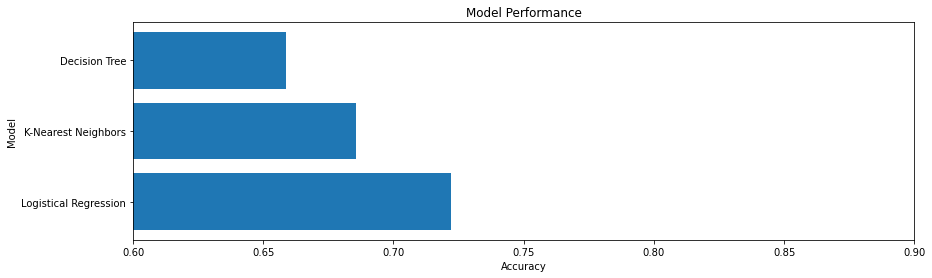

In [65]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14,4))

# Create the horizontal bar chart
ax.barh(list(scores_down.keys()), list(scores_down.values()))

# Set the title and axis labels
ax.set_title('Model Performance')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')

# Set the x-axis range
ax.set_xlim([0.6, 0.9])

# Display the chart
plt.show()

In [ ]:
### 3.2.3. Compare Sampling Methods

In [80]:
compare_models['sampling'] = 'None'

In [83]:
method_scores = pd.concat([scores_sm_df, scores_up_df, scores_tl_df, scores_down_df, compare_models], axis=0)
method_scores.reset_index(drop = True)

,Logistical Regression,K-Nearest Neighbors,Decision Tree,sampling
0,0.718081,0.723613,0.750306,Upsampling (SMOTE)
1,0.719044,0.721810,0.866675,Upsampling (Pandas Sample)
2,0.791514,0.781099,0.751591,Downsampling (TomekLinks)
3,0.722034,0.685424,0.658644,Downsampling (Pandas Sample)
4,0.793403,0.789498,0.791444,None
